### 3-1. 데이터의 이해
#### 데이터 리드(data lead)

In [6]:
import pandas as pd


# csv 파일 불러오기
dataframe = pd.read_csv("data/bank.csv")

# 처음부터 5행까지 표시
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


- 분석 목표: `계약 가능성이 높은 고객을 찾아내는 것`
- 데이터 구성: `한 행에 고객 한 명`의 데이터가 들어있다.<br>
고객마다 다음 항목(속성)이 있다.
    - age: 나이
    - job: 직업
    - marital: 결혼 이력
    - education: 학력
    - default: 채무 불이행 유무
    - balance: 연간 평균 잔고
    - housing: 주택 대출 유무
    - loan: 개인 대출 유무
    - contact: 연락 수단
    - day: 마지막으로 접촉한 날짜
    - month: 마지막으로 접촉한 달
    - duration: 접촉한 시간
    - campaign: 이번 캠페인으로 접촉한 횟수
    - pdays: 지난 번 캠페인에서 마지막으로 접촉한 후의 경과 시간
    - previous: 이번 캠페인 이전에 접촉한 횟수
    - poutcome: 지난 번 캠페인의 성공 유무
    - y: 예금 신청 유무

In [7]:
# 끝에서부터 10행 위까지 표시
dataframe.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [14]:
# 데이터의 행렬 수 파악
print(dataframe.shape)

(7234, 17)


In [13]:
# 파일 전체의 정보 표시
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


#### 결손값의 확인

In [18]:
# 데이터열에 결손값이 포함되어 있는가?
print(dataframe.isnull().any(axis=0))

# 데이터행에 결손값이 포함되어 있는가?
print(dataframe.isnull().any(axis=1))

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool
0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool


In [20]:
# 데이터 열별 결손값의 갯수
print(dataframe.isnull().sum(axis=0))

# 데이터 행별 결손값의 갯수
print(dataframe.isnull().sum(axis=1))

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64
0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64


In [27]:
# 데이터 행별 결손값의 갯수를 내림차순으로 정렬
dataframe.isnull().sum(axis=1).sort_values(ascending=False)

1837    4
1629    4
139     4
1814    4
1670    4
       ..
5919    0
5918    0
5917    0
5916    0
5379    0
Length: 7234, dtype: int64

#### 통계량의 계산

In [28]:
# 수치 데이터의 요약 정보
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [29]:
# 자료형이 문자열인 각종 통계량 계산
# unique: 원소 갯수, top: 최빈값, freq: 최빈값의 빈도수
dataframe.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


#### 데이터의 시각화

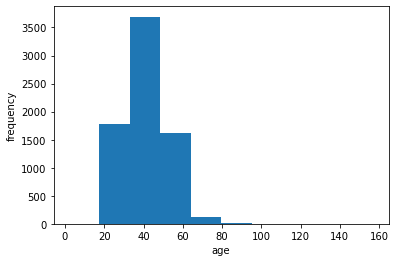

In [30]:
import matplotlib.pyplot as plt


# age 열의 히스토그램 작성
plt.hist(dataframe["age"])
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

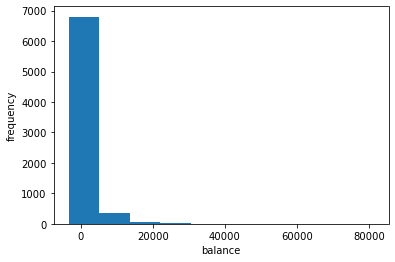

In [31]:
# balance 열의 히스토그램 작성
plt.hist(dataframe["balance"])
plt.xlabel("balance")
plt.ylabel("frequency")
plt.show()

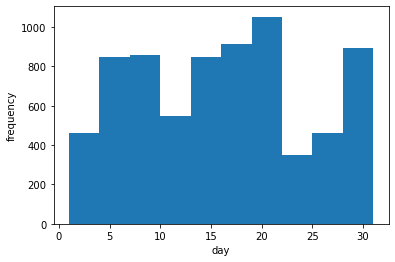

In [32]:
# day 열의 히스토그램 작성
plt.hist(dataframe["day"])
plt.xlabel("day")
plt.ylabel("frequency")
plt.show()

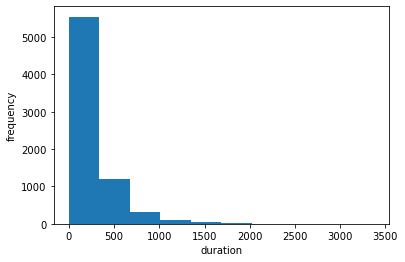

In [33]:
# duration 열의 히스토그램 작성
plt.hist(dataframe["duration"])
plt.xlabel("duration")
plt.ylabel("frequency")
plt.show()

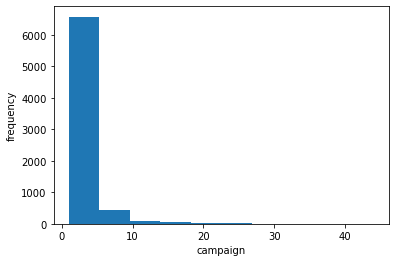

In [34]:
# campaign 열의 히스토그램 작성
plt.hist(dataframe["campaign"])
plt.xlabel("campaign")
plt.ylabel("frequency")
plt.show()

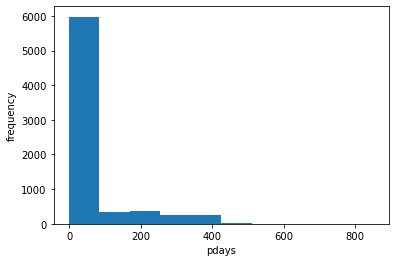

In [35]:
# pdays 열의 히스토그램 작성
plt.hist(dataframe["pdays"])
plt.xlabel("pdays")
plt.ylabel("frequency")
plt.show()

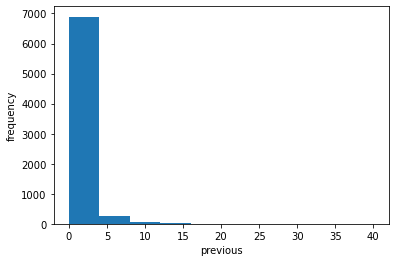

In [36]:
# previous 열의 히스토그램 작성
plt.hist(dataframe["previous"])
plt.xlabel("previous")
plt.ylabel("frequency")
plt.show()

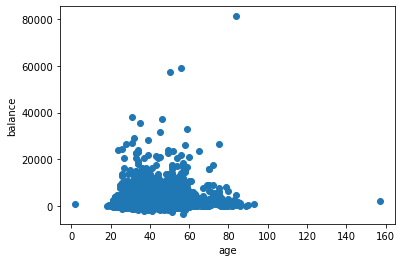

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [42]:
# age & balance 열의 산포도 작성
plt.scatter(dataframe["age"], dataframe["balance"])
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

# age & balance 열의 상호 관련성을 알아보기 위해 피어슨 상관계수를 사용
dataframe[["age", "balance"]].corr()

- 데이터를 분석할 때 상관에 관련된 `공선성(Collinearity)`에 대해서도 고려하지 않으면 안 된다.<br>
공선성은 변수(항목) 상호 간에 강하게 상관해 발생하는 문제이다.
- 공선성이 일으키는 문제에는 모델 작성에 관련된 계산량의 증대, 모델의 성능 저하, 모델의 불안정화 등이 있다.<br>
이와 같은 문제를 방지하려면 데이터 준비 단계에서 상관이 강한 변수를 제외하면 된다.<br>
또, 상관관계가 있어도 인과관계(원인과 결과)가 꼭 있다고 하기는 어렵다. 다음 세 개의 현상들은<br>
상관관계나 인과관계 중 어느 쪽일까?
    - 1. 키가 크면 체중이 증가한다.
    - 2. 파출소의 수가 많은 지역일수록 번죄 건수가 많다.
    - 3. 기온이 상승하면 맥주 판매가 늘어난다.
        - `1번`과 `3번`은 사상(사실과 현상) 간에 `상관관계`가 있으며, `2번`은 사상 간에 `인과관계`가 있다.<br>
        `2번`은 범죄 건수가 많은 지역이므로 치안 유지를 위해서 파출소가 많이 설치된, 다시 말해서<br>
        `파출소 수 -> 범죄건수`가 성립된다.
        - 이처럼 두 개의 사상 간에 `상관관계가 있어도 인과관계는 없는`<br>
        또는 `그 반대인(상관관계는 없지만 인과관계가 있는)` 경우도 있다.

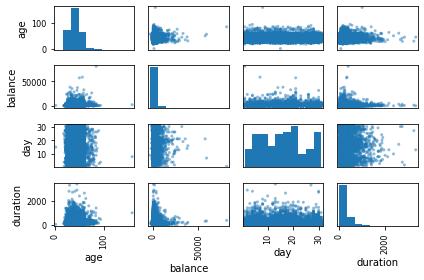

In [47]:
# 산포도 행렬
pd.plotting.scatter_matrix(dataframe[["age", "balance", "day", "duration"]])
plt.tight_layout()
plt.show()